# Create Figures for Paper

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

fsize = 8
tsize = 10
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('grid')
# plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

errbar_kwargs = dict(marker='.', markersize=3, capsize=3, elinewidth=1, lw=1)
plot_kwargs = dict(marker='.', markersize=3, lw=1)
errband_kwargs = dict(alpha=0.25)

save_dir = '../iclr/figures/experiments'

In [2]:
cmap = plt.cm.tab20
color_map = {
    'Abstractor': cmap(0), 'Pretrained': cmap(1), 
    'Transformer': cmap(4), 'Pretrained': cmap(5),
    'CoRelNet': cmap(2), 'CoRelNet (Asymmetric)': cmap(6), 'CoRelNet (No Softmax)': cmap(6),
    'Ablation Model': cmap(14)}

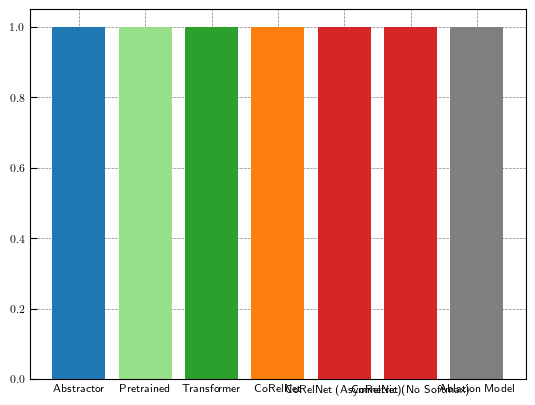

In [3]:
plt.bar(list(range(len(color_map))), 1, color=color_map.values());
plt.xticks(list(range(len(color_map))), color_map.keys());

## Pairwise Order relation

`experiments/pairwise_order`

In [4]:
%%capture
figure_data = pd.read_csv('figure_data/pairwise_order_learning_curves_2023-09-11-1300.csv', index_col=0)
agg_figure_data = figure_data.groupby(['group', 'train_size'])
metrics = ['binary_accuracy']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

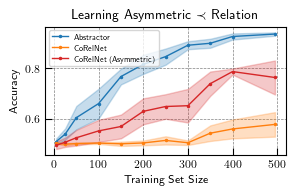

In [5]:
fig, ax = plt.subplots(figsize=(3,2))
x_name = 'train_size'
metric_name = 'binary_accuracy'
label_map = {'abstractor': 'Abstractor', 'corelnet': 'CoRelNet', 'asymmetric_corelnet': 'CoRelNet (Asymmetric)'}
for group in label_map:
    group_df = agg_figure_data[agg_figure_data.group==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    group_name = label_map[group]
    ax.plot(x, y, **plot_kwargs, c=color_map[group_name], label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, color=color_map[group_name], **errband_kwargs)

ax.set_xlabel('Training Set Size');
ax.set_ylabel('Accuracy');
ax.set_title('Learning Asymmetric $\prec$ Relation')
ax.legend(loc='upper left', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8);
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/pairwise_order_learning_curves.pdf')

## SET

In [6]:
%%capture
figure_data = pd.read_csv('figure_data/set_learning_curves_2023-09-11.csv', index_col=0)
agg_figure_data = figure_data.groupby(['group', 'train_size'])
metrics = ['acc']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

In [7]:
agg_figure_data

,group,train_size,acc mean,acc max,acc sem,acc len
0,abstractor,500,0.70670,0.7630,0.014496,10
1,abstractor,1000,0.86725,0.9085,0.008156,10
2,abstractor,2000,0.94435,0.9680,0.004669,10
3,abstractor,3000,0.95615,0.9705,0.002907,10
4,abstractor,4000,0.97180,0.9845,0.003129,10
5,abstractor,5000,0.97205,0.9890,0.003037,10
6,corelnet,500,0.51065,0.5335,0.005244,10
7,corelnet,1000,0.52285,0.5465,0.004132,10
8,corelnet,2000,0.53185,0.5525,0.004532,10
9,corelnet,3000,0.53375,0.5615,0.004556,10


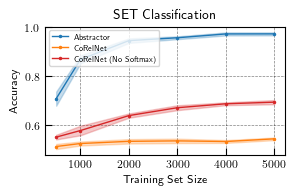

In [8]:
fig, ax = plt.subplots(figsize=(3,2))
x_name = 'train_size'
metric_name = 'acc'
label_map = {'abstractor': 'Abstractor', 'corelnet': 'CoRelNet', 'no-softmax corelnet': 'CoRelNet (No Softmax)'}
for group in label_map:
    group_df = agg_figure_data[agg_figure_data.group==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    group_name = label_map[group]
    ax.plot(x, y, **plot_kwargs, c=color_map[group_name], label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, color=color_map[group_name], **errband_kwargs)

ax.set_xlabel('Training Set Size');
ax.set_ylabel('Accuracy');
ax.set_title("SET Classification")
ax.legend(loc='upper left', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8);
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/set_classification.pdf')

## Random Object Sorting

experiment in `experiments/object_argsort_autoregressive`

W&B project: `object_argsort_autoregressive`

In [9]:
%%capture
figure_data = pd.read_csv('figure_data/object_argsort_autoregressive.csv', index_col=0)
agg_figure_data = figure_data.groupby(['group', 'train size'])
metrics = ['teacher_forcing_accuracy', 'elementwise_accuracy', 'full_sequence_accuracy', 'epoch/epoch']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

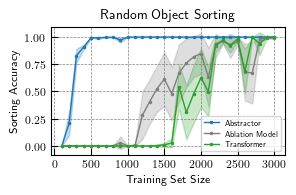

In [10]:
fig, ax = plt.subplots(figsize=(3,2))
x_name = 'train size'
metric_name = 'full_sequence_accuracy'

label_map = {'Relational Abstractor': 'Abstractor', 'Ablation Abstractor': 'Ablation Model', 'Transformer': 'Transformer'}
for group, group_name in label_map.items():
    group_df = agg_figure_data[agg_figure_data.group==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    ax.plot(x, y, **plot_kwargs, c=color_map[group_name], label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, color=color_map[group_name], **errband_kwargs)

ax.set_xlabel('Training Set Size');
ax.set_ylabel('Sorting Accuracy');
ax.legend(loc='lower right', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8);
ax.set_title('Random Object Sorting');
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/random_object_sorting.pdf')

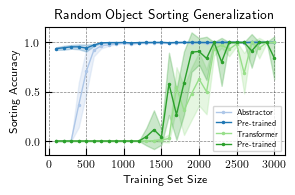

In [11]:
fig, ax = plt.subplots(figsize=(3,2))
x_name = 'train size'
metric_name = 'full_sequence_accuracy'

color_map_ = {
    'Abstractor': cmap(1), 'Pre-trained': cmap(0),
    'Transformer': cmap(5), 'Pre-trained ': cmap(4),
    }

label_map = {
    'Simple Abstractor': 'Abstractor',
    'Simple Abstractor (Pre-Trained; reshuffled attr)': 'Pre-trained',
    'Transformer': 'Transformer', 'Transformer (Pre-Trained; reshuffled attr)': 'Pre-trained '}

for group, group_name in label_map.items():
    group_df = agg_figure_data[agg_figure_data.group==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    linestyle = ':' if ('pre-trained' in group_name) else '-'
    ax.plot(x, y, **plot_kwargs, c=color_map_[group_name], linestyle=linestyle, label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, color=color_map_[group_name], **errband_kwargs)

ax.set_xlabel('Training Set Size');
ax.set_ylabel('Sorting Accuracy');
ax.legend(loc='lower right', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8, ncol=1);
ax.set_title('Random Object Sorting Generalization');
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/random_object_sorting_generalization.pdf')

## Robustness

directory: `experiments/robustness_object_sorting`
W&B project: `robustness_object_sorting`

In [12]:
%%capture
figure_data = pd.read_csv('figure_data/multiplicative_robustness_data.csv', index_col=0)
agg_figure_data = figure_data.groupby(['model', 'noise level'])
metrics = ['teacher_forcing_accuracy', 'elementwise_accuracy', 'full_sequence_accuracy']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

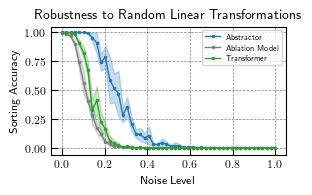

In [13]:
fig, ax = plt.subplots(figsize=(3,2))
x_name = 'noise level'
metric_name = 'full_sequence_accuracy'

label_map = {'Relational Abstractor': 'Abstractor', 'Ablation Model': 'Ablation Model', 'Transformer': 'Transformer'}
for group, group_name in label_map.items():
    group_df = agg_figure_data[agg_figure_data.model==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    ax.plot(x, y, **plot_kwargs, c=color_map[group_name], label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, color=color_map[group_name], **errband_kwargs)

ax.set_xlabel('Noise Level');
ax.set_ylabel('Sorting Accuracy');
ax.legend(loc='upper right', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8);
ax.set_title('Robustness to Random Linear Transformations');
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/multiplicative_robustness.pdf')

In [14]:
%%capture
figure_data = pd.read_csv('figure_data/additive_robustness_data.csv', index_col=0)
agg_figure_data = figure_data.groupby(['model', 'noise level'])
metrics = ['teacher_forcing_accuracy', 'elementwise_accuracy', 'full_sequence_accuracy']
agg_figure_data = agg_figure_data[metrics].agg(
    [np.mean, np.max, scipy.stats.sem, len])
agg_figure_data = agg_figure_data.reset_index()
agg_figure_data.columns = [' '.join(col).strip() for col in agg_figure_data.columns.values]

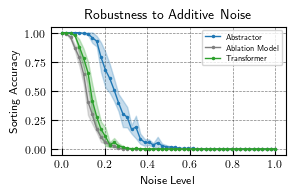

In [15]:
fig, ax = plt.subplots(figsize=(3,2))
x_name = 'noise level'
metric_name = 'full_sequence_accuracy'

label_map = {'Relational Abstractor': 'Abstractor', 'Ablation Model': 'Ablation Model', 'Transformer': 'Transformer'}
for group, group_name in label_map.items():
    group_df = agg_figure_data[agg_figure_data.model==group]

    x = group_df[x_name]
    y = group_df[f'{metric_name} mean']
    y_err = 2*group_df[f'{metric_name} sem']

    ax.plot(x, y, **plot_kwargs, c=color_map[group_name], label=group_name)

    # ax.errorbar(x, y, y_err, **errbar_kwargs, label=group_name)
    ax.fill_between(x, y - y_err, y + y_err, color=color_map[group_name], **errband_kwargs)

ax.set_xlabel('Noise Level');
ax.set_ylabel('Sorting Accuracy');
ax.legend(loc='upper right', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8);
ax.set_title('Robustness to Additive Noise');
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/additive_robustness.pdf')

## SET (comparison to symbolic baseline)

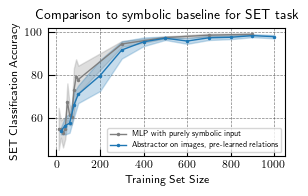

In [16]:
def plot_symbolic_comparison(pretrained_n, pretrained_accs, scratch_n, scratch_accs):
    import scipy.stats
    scratch_accuracy = np.mean(scratch_accs, axis=1)
    scratch_acc_sem = scipy.stats.sem(scratch_accs, axis=1)
    pretrained_accuracy = np.mean(pretrained_accs, axis=1)
    pretrained_acc_sem = scipy.stats.sem(pretrained_accs, axis=1)
    fig, ax = plt.subplots(figsize=(3,2))
    ax.plot(scratch_n, scratch_accuracy, **plot_kwargs, c=color_map['Ablation Model'], label='MLP with purely symbolic input')
    ax.fill_between(scratch_n, scratch_accuracy - 2*scratch_acc_sem,
        scratch_accuracy + 2*scratch_acc_sem, color=color_map['Ablation Model'], **errband_kwargs)
    ax.plot(pretrained_n, pretrained_accuracy, c=color_map['Abstractor'], label='Abstractor on images, pre-learned relations', **plot_kwargs)
    ax.fill_between(pretrained_n, pretrained_accuracy - 2*pretrained_acc_sem,
        pretrained_accuracy + 2*pretrained_acc_sem, color=color_map['Abstractor'], **errband_kwargs)
    ax.set_xlabel('Training Set Size')
    ax.legend(loc='lower right', fontsize='x-small', fancybox=True, frameon=True, framealpha=0.8);
    ax.set_ylabel('SET Classification Accuracy')
    ax.set_title("Comparison to symbolic baseline for SET task")
    fig.set_tight_layout(True)
    fig.savefig(f'{save_dir}/set_symbolic_vs_abstractor.pdf')
    plt.show()

dat = np.load('symbolic_vs_abstractor_run0.npz')
train_sizes = dat['train_sizes']
accs = dat['accs']
symbolic_train_sizes = dat['symbolic_train_sizes']
symbolic_accs = dat['symbolic_accs']
plot_symbolic_comparison(train_sizes, accs, symbolic_train_sizes, symbolic_accs)


## Math - end-of-training metrics

In [17]:
figure_data = pd.read_csv('figure_data/math/math_endoftraining_metrics.csv', index_col=0)

metrics = ['TF Accuracy', 'TF Accuracy (val)']
models = ['transformer-medium', 'transformer-medium+', 'relational_abstractor-medium'] #, 'relational_abstractor2-medium'] (only has 1 trial each for now)
model_name_map = {
        'transformer-medium': 'Transformer', 'transformer-medium+': 'Transformer+',
        'relational_abstractor-medium': 'Abstractor arch. (b)', 'relational_abstractor2-medium': 'Abstractor arch. (c)'}

table_data = figure_data.copy()

model_filter = table_data['group'].isin(models)
name_filter = table_data.name.str.contains('trial=')
table_data = table_data[model_filter & name_filter]

table_data['group'] = pd.Categorical(table_data['group'], models, ordered=True)
table_data['group'] = table_data['group'].map(model_name_map)
table_data.rename(columns={'group': 'Model', 'task': 'Task', 'teacher_forcing_accuracy': 'TF Accuracy', 'val_teacher_forcing_accuracy': 'TF Accuracy (val)'},
        inplace=True)

table_data_agg = table_data.groupby(['Task', 'Model'])[metrics].aggregate(['mean', 'sem', 'std', 'count'])
table_data_agg.sort_index(inplace=True)
table_data_agg

TF Accuracy            \
                                                        mean       sem   
Task                        Model                                        
algebra__linear_1d          Transformer             0.694467  0.003265   
                            Transformer+            0.687717  0.008925   
                            Abstractor arch. (b)    0.779693  0.015068   
algebra__sequence_next_term Transformer             0.815036  0.003734   
                            Transformer+            0.849165  0.003510   
                            Abstractor arch. (b)    0.895911  0.004119   
calculus__differentiate     Transformer             0.970101  0.000867   
                            Transformer+            0.979054  0.000950   
                            Abstractor arch. (b)    0.990697  0.001018   
polynomials__add            Transformer             0.837128  0.000562   
                            Transformer+            0.846718  0.000309   
                            Abstractor arch. (b)    0.858914  0.000302   
polynomials__expand         Transformer             0.775054  0.000341   
                            Transformer+            0.781472  0.000636   
                            Abstractor arch. (b)    0.807427  0.003696   

                                                                  \
                                                       std count   
Task                        Model                                  
algebra__linear_1d          Transformer           0.007301     5   
                            Transformer+          0.019956     5   
                            Abstractor arch. (b)  0.033692     5   
algebra__sequence_next_term Transformer           0.008350     5   
                            Transformer+          0.007848     5   
                            Abstractor arch. (b)  0.009210     5   
calculus__differentiate     Transformer           0.001938     5   
                            Transformer+          0.002124     5   
                            Abstractor arch. (b)  0.002277     5   
polynomials__add            Transformer           0.001256     5   
                            Transformer+          0.000690     5   
                            Abstractor arch. (b)  0.000675     5   
polynomials__expand         Transformer           0.000762     5   
                            Transformer+          0.001422     5   
                            Abstractor arch. (b)  0.008265     5   

                                                 TF Accuracy (val)            \
                                                              mean       sem   
Task                        Model                                              
algebra__linear_1d          Transformer                   0.650543  0.005585   
                            Transformer+                  0.629219  0.015689   
                            Abstractor arch. (b)          0.718515  0.017966   
algebra__sequence_next_term Transformer                   0.855625  0.005613   
                            Transformer+                  0.879568  0.005360   
                            Abstractor arch. (b)          0.915834  0.004774   
calculus__differentiate     Transformer                   0.991787  0.000510   
                            Transformer+                  0.994080  0.000278   
                            Abstractor arch. (b)          0.997819  0.000466   
polynomials__add            Transformer                   0.832675  0.000588   
                            Transformer+                  0.841689  0.000489   
                            Abstractor arch. (b)          0.856822  0.000593   
polynomials__expand         Transformer                   0.755205  0.000526   
                            Transformer+                  0.761718  0.000875   
                            Abstractor arch. (b)          0.787133  0.003476   

                                                  

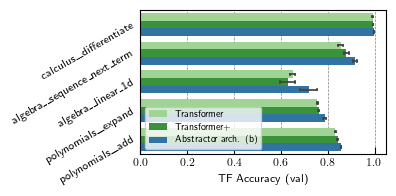

In [38]:
# bar plot figure
color_map_ = {
    'Abstractor arch. (b)': cmap(0),
    'Transformer': cmap(5), 'Transformer+': cmap(4),
    }

fig, ax = plt.subplots(figsize=(4, 2))
sns.barplot(table_data.reset_index(), x='TF Accuracy (val)', y='Task', hue='Model', orient='h', palette=color_map_, 
                        estimator='mean', errorbar=('se', 2), errwidth=1.25, capsize=0.05, ax=ax)
plt.yticks(rotation=30)
ax.set_ylabel('')
fig.set_tight_layout(True)
sns.move_legend(ax, "lower left", fontsize='small', fancybox=True, frameon=True, framealpha=0.8, title=None)
fig.savefig(f'{save_dir}/math_metrics.pdf')

In [19]:
# input('overwrite latex table?')
# table_data = table_data.rename(columns={'teacher_forcing_accuracy': 'tf acc', 'val_teacher_forcing_accuracy': 'tf acc (val)'}).round(3)
# latex_table = table_data.to_latex(escape=True)
# latex_table_file = f'{save_dir}/math_tfm_metrics_table.tex'
# with open(latex_table_file, 'w') as f:
#     f.write(latex_table)

In [20]:
# input('overwrite latex table?')
# latex_table = table_data.to_latex(escape=True)
# latex_table_file = f'{save_dir}/math_metrics_table.tex'
# with open(latex_table_file, 'w') as f:
#     f.write(latex_table)

## Math - Training Curves

In [21]:
figure_data = pd.read_csv('figure_data/math/project_run_histories/project_run_histories.csv', index_col=0)

models = ['transformer-medium', 'transformer-medium+', 'relational_abstractor-medium'] #, 'relational_abstractor2-medium'] (only has 1 trial each for now)
model_name_map = {
        'transformer-medium': 'Transformer', 'transformer-medium+': 'Transformer+',
        'relational_abstractor-medium': 'Abstractor arch. (b)', 'relational_abstractor2-medium': 'Abstractor arch. (c)'}

model_filter = figure_data['group'].isin(models)
name_filter = figure_data.name.str.contains('trial=')
figure_data = figure_data[model_filter & name_filter]

figure_data['group'] = pd.Categorical(figure_data['group'], models, ordered=True)
figure_data['group'] = figure_data['group'].map(model_name_map)
figure_data.rename(columns={'group': 'Model', 'task': 'Task', 'teacher_forcing_accuracy': 'TF Accuracy', 'val_teacher_forcing_accuracy': 'TF Accuracy (val)'},
        inplace=True)


In [22]:
# bar plot figure
color_map_ = {
    'Abstractor arch. (b)': cmap(0),
    'Transformer': cmap(5), 'Transformer+': cmap(4),
    }

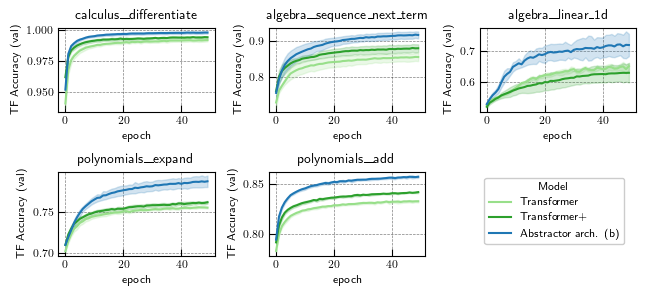

In [23]:
tasks = figure_data.Task.unique()

fig = plt.figure(figsize=(6.5,3))

axes = []
for i, task in enumerate(tasks):
    task_filter = figure_data.Task == task
    ax_data = figure_data[task_filter]

    ax = fig.add_subplot(2, 3, i+1)
    sns.lineplot(ax_data, x='epoch', y='TF Accuracy (val)', hue='Model', legend=False,  palette=color_map_,
        estimator='mean', errorbar=('se', 2), ax=ax)
    ax.set_title(task)
    axes.append(ax)

fig.legend(handles=ax.get_lines(), labels=model_name_map.values(),  loc=(0.75, 0.175), fontsize='medium', title='Model')
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/math_training_curves.pdf')